# 순위 검색

## 문제
이번 채용에서 지원자는 지원서 작성 시 아래와 같이 4가지 항목을 반드시 선택
 - 코딩테스트 참여 개발언어 항목에 cpp, java, python 중 하나를 선택
 - 지원 직군 항목에 backend와 frontend 중 하나를 선택
 - 지원 경력구분 항목에 junior와 senior 중 하나를 선택
 - 선호하는 소울푸드로 chicken과 pizza 중 하나를 선택
지원자가 지원서에 입력한 4가지의 정보와 획득한 코딩테스트 점수를 하나의 문자열로 구성한 값의 배열 info, 개발팀이 궁금해하는 문의조건이<br>
문자열 형태로 담긴 배열 query가 매개변수로 주어질 때, <br>
각 문의조건에 해당하는 사람들의 숫자를 순서대로 배열에 담아 return 
<br><br>
input : info = 문자열 배열, query = 문자열 배열, output : 정수 배열

#### <조건>
 - info 배열의 크기는 1 이상 50,000 이하
 - info 배열 각 원소의 값은 지원자가 지원서에 입력한 4가지 값과 코딩테스트 점수를 합친 "개발언어 직군 경력 소울푸드 점수" 형식
   - 개발언어는 cpp, java, python 중 하나
   - 직군은 backend, frontend 중 하나
   - 경력은 junior, senior 중 하나
   - 소울푸드는 chicken, pizza 중 하나
   - 점수는 코딩테스트 점수를 의미하며, 1 이상 100,000 이하인 자연수
   - 각 단어는 공백문자(스페이스 바) 하나로 구분
 - query 배열의 크기는 1 이상 100,000 이하
 - query의 각 문자열은 "[조건] X" 형식
   - [조건]은 "개발언어 and 직군 and 경력 and 소울푸드" 형식의 문자열
   - 언어는 cpp, java, python, - 중 하나
   - 직군은 backend, frontend, - 중 하나
   - 경력은 junior, senior, - 중 하나
   - 소울푸드는 chicken, pizza, - 중 하나
   - '-' 표시는 해당 조건을 고려하지 않겠다는 의미
   - X는 코딩테스트 점수를 의미하며 조건을 만족하는 사람 중 X점 이상 받은 사람은 모두 몇 명인 지를 의미
   - 각 단어는 공백문자(스페이스 바) 하나로 구분
   - 예를 들면, "cpp and - and senior and pizza 500"은 "cpp로 코딩테스트를 봤으며, <br>
     경력은 senior 이면서 소울푸드로 pizza를 선택한 지원자 중 코딩테스트 점수를 500점 이상 받은 사람은 모두 몇 명인가?"를 의미
     
#### <예시>
input : info = ["java backend junior pizza 150","python frontend senior chicken 210","python frontend senior chicken 150","cpp backend senior pizza 260","java backend junior chicken 80","python backend senior chicken 50"] , query = ["java and backend and junior and pizza 100","python and frontend and senior and chicken 200","cpp and - and senior and pizza 250","- and backend and senior and - 150","- and - and - and chicken 100","- and - and - and - 150"]
<br><br>
result : [1,1,1,1,2,4]
<br><br>
 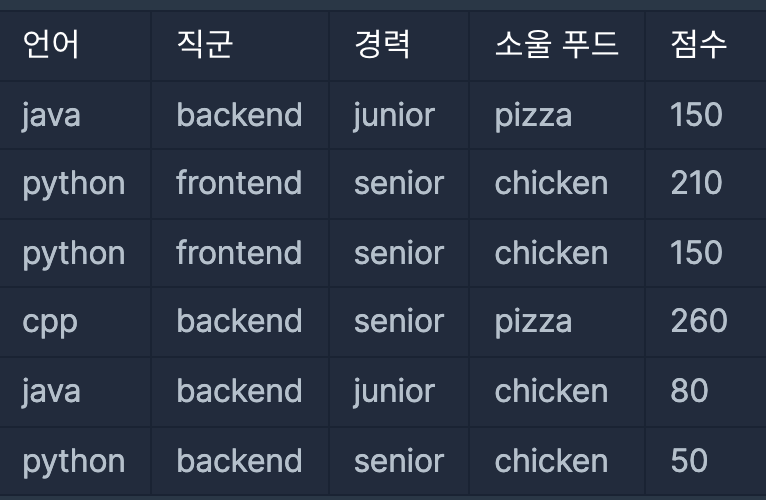
 
 - "java and backend and junior and pizza 100" : java로 코딩테스트를 봤으며, backend 직군을 선택했고 junior 경력이면서 소울푸드로 pizza를 선택한 지원자 중 코딩테스트 점수를 100점 이상 받은 지원자는 1명
 - "python and frontend and senior and chicken 200" : python으로 코딩테스트를 봤으며, frontend 직군을 선택했고, senior 경력이면서 소울 푸드로 chicken을 선택한 지원자 중 코딩테스트 점수를 200점 이상 받은 지원자는 1명
 - "cpp and - and senior and pizza 250" : cpp로 코딩테스트를 봤으며, senior 경력이면서 소울푸드로 pizza를 선택한 지원자 중 코딩테스트 점수를 250점 이상 받은 지원자는 1명
 - "- and backend and senior and - 150" : backend 직군을 선택했고, senior 경력인 지원자 중 코딩테스트 점수를 150점 이상 받은 지원자는 1명
 - "- and - and - and chicken 100" : 소울푸드로 chicken을 선택한 지원자 중 코딩테스트 점수를 100점 이상을 받은 지원자는 2명
 - "- and - and - and - 150" : 코딩테스트 점수를 150점 이상 받은 지원자는 4명
 - 따라서, [1, 1, 1, 1, 2, 4] return
 
https://programmers.co.kr/learn/courses/30/lessons/72412

## 풀이
 ### 1.
  - query에서 and를 제거하고 공백을 기준으로 나눔
  - info도 공백을 기준으로 나눠줌
  - answer를 미리 query의 길이만큼 0으로 채워서 만들어줌
  - query를 돌면서 query에 '-'가 없는 경우에는 info를 돌면서 요구조건이 같고, 코딩테스트 점수가 더 높은 지원자의 수를 answer에 넣어줌
  - '-'가 있는 경우에는 '-'가 없는 위치의 인덱스 번호를 구함
  - 인덱스 번호에 맞는 위치만 요구조건을 비교하고, 코딩테스트 점수를 비교해서 적절한 지원자의 수를 answer에 넣어줌
  - 모든 query를 다 돌으면 answer를 return
  
    => 정확성은 모두 통과 <br>
    => 효율성을 통과 x
    
 ### 2.
  - 효율성을 늘리기 위해서 방식을 전환
  - 정해진 info를 가지고 만들 수 있는 모든 경우를 dict형태로 info_dict에 저장
  - info_dict을 value값을 가지고 정렬해줌
  - query를 돌면서 query를 조건과 코딩테스트 점수로 나누어서 q에 저장해줌
  - 이때 만약 조건이 info에 존재하지 않다면 answer에 0을 넣어줌
  - 해당 조건의 코딩테스트 점수 리스트를 score_list에 저장
  - 만약 score_list의 최소값이 q의 점수보다 크거나 같다면 score_list의 길이만큼의 지원자가 요구조건을 만족함
  - 만약 score_list의 최대값이 q의 점수보다 작다면 요구조건을 만족하는 지원자는 존재하지 않음
  - 그외의 경우는 이진탐색을 이용해서 score_list에서 요구조건을 만족하는 지원자의 수를 구해 return 해줌
  - query를 돌면서 얻은 answer값을 모두 구하면 return
  
   => 정확성, 효율성 2개 통과
   => 효율성 2개는 통과 x 

 ### 3.
  - 2번과 같은 코드
  - answer[i] = len(score_list[start:]) -> answer[i] = len(score_list) - start 로 변경
  - 문자열 범위 다시 정해서 길이 구하는 것 보다 그냥 문자열 길이에서 정수를 뺴는게 더 효율적
  - 코드 한줄차이로 통과라니..ㅎ

In [1]:
# 1.

def solution(info, query):
    query = [q.split(' ') for q in [q.replace(' and ', ' ') for q in query]]
    info = [i.split(' ') for i in info]
    answer = [0] * len(query)

    for q in range(len(query)):
        if '-' not in query[q]:
            for i in info:
                if i[:-1] == query[q][:-1] and int(i[-1]) >= int(query[q][-1]):
                    answer[q] += 1
        else:
            q_list = list(idx for idx, value in enumerate(query[q][:-1]) if value != '-')
            for i in info:
                if list(map(lambda j:query[q][:-1][j], q_list)) == list(map(lambda j:i[:-1][j], q_list)) and int(i[-1]) >= int(query[q][-1]):
                    answer[q] += 1
                
            
    return answer

In [2]:
# 2.

import re
import itertools

def solution(info, query):
    answer = [0 for i in query]
    
    info = [[j]+['-'] if j.isalpha() else [j] for i in [i.split(' ') for i in info] for j in i]
    info_dict = dict()
    

    for i in range(0, len(info), 5):
        pro_list = info[i:i+4]
        pro_score = list(map(int, info[i+4]))
        
        pro_list = list(itertools.product(*pro_list))
        
        for pro in pro_list:
            if ''.join(pro) in info_dict:
                info_dict[''.join(pro)].append(pro_score[0])
            else:
                info_dict[''.join(pro)] = list(pro_score)

    for i in info_dict.values():
        i.sort()
    
    for i in range(len(query)):
        q = query[i].replace(' and ', '').split(' ')
        
        if q[0] not in info_dict:
            answer[i] = 0
            continue
            
        score_list = info_dict[q[0]]
        
        start, end = 0, len(score_list)
        
        while start < end:
            mid = (start + end) // 2
            if score_list[mid] >= int(q[1]):
                end = mid
            else:
                start = mid + 1
        answer[i] = len(score_list[start:])
        
            
    return answer

In [3]:
# 3.

import re
import itertools

def solution(info, query):
    answer = [0 for i in query]
    
    info = [[j]+['-'] if j.isalpha() else [j] for i in [i.split(' ') for i in info] for j in i]
    info_dict = dict()
    

    for i in range(0, len(info), 5):
        pro_list = info[i:i+4]
        pro_score = list(map(int, info[i+4]))
        
        pro_list = list(itertools.product(*pro_list))
        
        for pro in pro_list:
            if ''.join(pro) in info_dict:
                info_dict[''.join(pro)].append(pro_score[0])
            else:
                info_dict[''.join(pro)] = list(pro_score)

    for i in info_dict.values():
        i.sort()
    
    for i in range(len(query)):
        q = query[i].replace(' and ', '').split(' ')
        
        if q[0] not in info_dict:
            answer[i] = 0
            continue
            
        score_list = info_dict[q[0]]
        
        start, end = 0, len(score_list)
        
        while start < end:
            mid = (start + end) // 2
            if score_list[mid] >= int(q[1]):
                end = mid
            else:
                start = mid + 1
        answer[i] = len(score_list) - start
        
            
    return answer

In [4]:
info = ["java backend junior pizza 150","python frontend senior chicken 210","python frontend senior chicken 150","cpp backend senior pizza 260","java backend junior chicken 80","python backend senior chicken 50"]
query = ["java and backend and junior and pizza 100","python and frontend and senior and chicken 200","cpp and - and senior and pizza 250","- and backend and senior and - 150","- and - and - and chicken 100","- and - and - and - 150"]

solution(info, query)

[1, 1, 1, 1, 2, 4]